In [104]:
import numpy as np
import pandas as pd
from rpy2.robjects import r, numpy2ri
numpy2ri.activate()
from rpy2.robjects.packages import importr
sinkr = importr('sinkr')
import matplotlib.pyplot as plt

# Read data

In [105]:
data=pd.read_csv('v100_hr_20200101-0930_cut_utf8.csv')

In [106]:
###
#cal_PMf  
###
u=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T
# print(np.shape(u))
# print(np.shape(v))

# DINEOF (like FPCA)

In [107]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 9.70166529"


[1]
 "1 EOF ; RMS = 9.70024702"


[1]
 "1 EOF ; RMS = 9.70100875"


[1]
 "2 EOF ; RMS = 8.92597408"


[1]
 "2 EOF ; RMS = 8.93031483"


[1]
 "3 EOF ; RMS = 8.63715669"


[1]
 "3 EOF ; RMS = 8.6421768"


[1]
 "4 EOF ; RMS = 8.3858678"


[1]
 "4 EOF ; RMS = 8.39346445"


[1]
 "5 EOF ; RMS = 8.1897145"


[1]
 "5 EOF ; RMS = 8.19413965"


[1]
 "6 EOF ; RMS = 8.05464518"


[1]
 "6 EOF ; RMS = 8.06045286"


[1]
 "7 EOF ; RMS = 8.00418581"


[1]
 "7 EOF ; RMS = 8.01887407"


[1]
 "8 EOF ; RMS = 7.93581677"


[1]
 "8 EOF ; RMS = 7.94117912"


[1]
 "9 EOF ; RMS = 7.90119596"


[1]
 "9 EOF ; RMS = 7.92199892"


[1]
 "10 EOF ; RMS = 7.86904381"


[1]
 "10 EOF ; RMS = 7.8871595"


[1]
 "11 EOF ; RMS = 7.87275857"


[1]
 "11 EOF ; RMS = 7.91247721"


[1]
 "12 EOF ; RMS = 7.91060727"


[1]
 "12 EOF ; RMS = 7.94923515"


[1]
 "13 EOF ; RMS = 7.93643791"


[1]
 "13 EOF ; RMS = 7.96828537"


[1]
 "14 EOF ; RMS = 7.9513681"


[1]
 "14 EOF ; RMS = 7.97849245"


[1]
 "15 

# Restruct Function

In [108]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
XCov_fun=np.cov(XRestruct_Fun.T)
XMean_fun=np.zeros(6816)
YMean_fun=np.zeros(6816)
for i in range(0,6816):
    for j in range(0,244):
        XMean_fun[i]=XMean_fun[i]+(XRestruct_Fun[j][i]/244)
        YMean_fun[i]=YMean_fun[i]+(YRestruct_Fun[j][i]/244)
# print(type(XRestruct_Fun))
# print(type(YRestruct_Fun))
# print(np.shape(XRestruct_Fun))
# print(np.shape(YRestruct_Fun))
# print(np.shape(XCov_fun))
# print(np.shape(XMean_fun))
# print(np.shape(YMean_fun))

In [109]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xbar=XMean_fun
Ybar=YMean_fun
# print('Xhat')
# #print(Xhat)
# print(np.shape(Xhat))
# print('Yhat')
# #print(Yhat)
# print(np.shape(Yhat))
# print('Xbar')
# #print(Xbar)
# print(np.shape(Xbar))
# print('Ybar')
# #print(Ybar)
# print(np.shape(Ybar))

# Regression

In [110]:
G_xx=XCov_fun
G_xxt=np.zeros(6816)
for i in range(0,6816):
     G_xxt[i]=G_xx[i][i]
# print(G_xxt)
# print(np.shape(G_xxt))

G_xy=0
for i in range (0,244):
    G_xyi=(Xhat[i]-Xbar)*(Yhat[i]-Ybar)
    G_xy=G_xy+G_xyi
G_xy=G_xy/243
# print(G_xy)
# print(np.shape(G_xy))

In [111]:
B_1=G_xy/G_xxt
B_0=YMean_fun-(B_1*XMean_fun)
B_1const=0
for i in range (0,6816):
    B_1const=B_1const+B_1[i]
B_1const=B_1const/6816

# print('B_1')
# #print(B_1)
# print(np.shape(B_1))
# print('B_0')
# #print(B_0)
# print(np.shape(B_0))
# print('B_1const')
# #print(B_1const)
# print(np.shape(B_1const))

## 畫 B_1 、const B_1 圖

Mean Residual : 0.138345


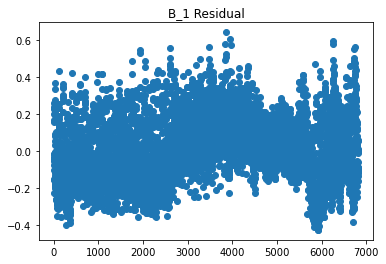

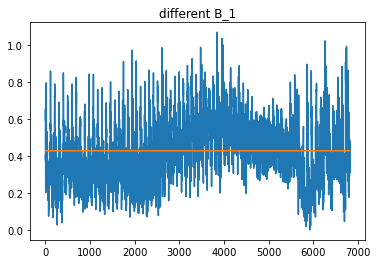

In [113]:
B_1r=np.zeros(6816)
B_1constp=np.zeros(6816)
mResidual=0
for i in range(6816):
    B_1constp[i]=B_1const
for i in range(6816):
    B_1r[i]=B_1[i]-B_1const
    mResidual=mResidual+abs(B_1r[i])
mResidual=mResidual/6816
print("Mean Residual : %f" %mResidual)
fig1 = plt.figure(1)
plt.plot(B_1r,'o')
plt.title('B_1 Residual')

fig2 = plt.figure(2)
plt.plot(B_1, label = 'B_1')
plt.plot(B_1constp, label ='B_1const')
plt.title('different B_1')

plt.show()

# Generate Calibrating Data

In [114]:
before_fx=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    before_fx[i]=a
# print(np.shape(before_fx))

In [115]:
after_fx_r=sinkr.dineof(before_fx)
after_fx=np.array(after_fx_r[0])
print(np.shape(after_fx))

[1]
 "1 EOF ; RMS = 10.05164176"


[1]
 "1 EOF ; RMS = 10.04414206"


[1]
 "1 EOF ; RMS = 10.04405872"


[1]
 "1 EOF ; RMS = 10.04408179"


[1]
 "2 EOF ; RMS = 9.22121238"


[1]
 "2 EOF ; RMS = 9.2210832"


[1]
 "2 EOF ; RMS = 9.22114876"


[1]
 "3 EOF ; RMS = 8.9256424"


[1]
 "3 EOF ; RMS = 8.92406958"


[1]
 "3 EOF ; RMS = 8.92325033"


[1]
 "3 EOF ; RMS = 8.92294067"


[1]
 "3 EOF ; RMS = 8.92282155"


[1]
 "3 EOF ; RMS = 8.92277211"


[1]
 "3 EOF ; RMS = 8.92275035"


[1]
 "3 EOF ; RMS = 8.9227404"


[1]
 "4 EOF ; RMS = 8.70309406"


[1]
 "4 EOF ; RMS = 8.70744933"


[1]
 "5 EOF ; RMS = 8.51201741"


[1]
 "5 EOF ; RMS = 8.51698454"


[1]
 "6 EOF ; RMS = 8.39822088"


[1]
 "6 EOF ; RMS = 8.40648976"


[1]
 "7 EOF ; RMS = 8.31462283"


[1]
 "7 EOF ; RMS = 8.32121651"


[1]
 "8 EOF ; RMS = 8.30633867"


[1]
 "8 EOF ; RMS = 8.32351855"


[1]
 "9 EOF ; RMS = 8.26625004"


[1]
 "9 EOF ; RMS = 8.28410402"


[1]
 "10 EOF ; RMS = 8.23609404"


[1]
 "10 EOF ; RMS = 8.24816235"


[1]
 "11 EO

In [116]:
fit_fx=B_0+(B_1*after_fx)
# print(np.shape(fit_fx))
fit_fxC=B_0+(B_1const*after_fx)
# print(np.shape(fit_fxC))

# Compare

In [117]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i]=a
#Delete missing data
for i in range(0,274):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
# print(np.shape(old_x))
# print(np.shape(old_y))
# print(np.shape(fit_fx))
# print(np.shape(fit_fxC))

## 總MADE

(i) Compare January to August (training data set)

In [118]:
before_error1=0
after_error1=0
after_errorC1=0
for i in range (0,244):
    for j in range(0,6816):
        before_error1=before_error1+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC1=after_errorC1+abs(fit_fxC[i][j]-old_y[i][j])
before_error1=before_error1/244/6816
after_error1=after_error1/244/6816
after_errorC1=after_errorC1/244/6816
print("January to August (training data set) before_error: %f" %before_error1)
print("January to August (training data set) after_error: %f" %after_error1)
print("January to August (training data set with const B_1) after_error: %f" %after_errorC1)

January to August (training data set) before_error: 7.961740
January to August (training data set) after_error: 6.546874
January to August (training data set with const B_1) after_error: 6.899853


(ii) Compare September (testing data set)

In [119]:
before_error2=0
after_error2=0
after_errorC2=0
for i in range (244,274):
    for j in range(0,6816):
        before_error2=before_error2+abs(old_x[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC2=after_errorC2+abs(fit_fxC[i][j]-old_y[i][j])
before_error2=before_error2/30/6816
after_error2=after_error2/30/6816
after_errorC2=after_errorC2/30/6816
print("September (testing data set) before_error: %f" %before_error2)
print("September (testing data set) after_error: %f" %after_error2)
print("September (testing data set with const B_1) after_error: %f" %after_errorC2)

September (testing data set) before_error: 7.356276
September (testing data set) after_error: 5.728357
September (testing data set with const B_1) after_error: 5.925919


## MADE with days (以預測日來看)

(i) Compare January to August (training data set)

In [120]:
caldays_before_error1=np.zeros(244)
caldays_after_error1=np.zeros(244)
caldays_after_errorC1=np.zeros(244)
error1=0
error2=0
error3=0
for i in range (0,244):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
        error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    caldays_before_error1[i]=error1/6816
    caldays_after_error1[i]=error2/6816
    caldays_after_errorC1[i]=error3/6816
    error1=0
    error2=0
    error3=0

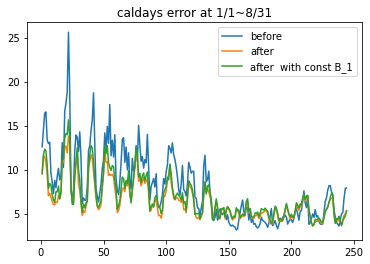

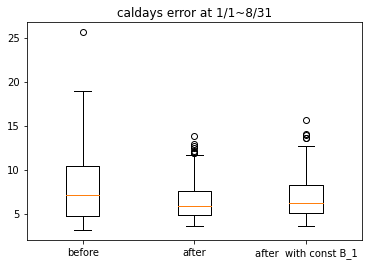

In [121]:
fig1 = plt.figure(1)
x=np.linspace(1,244,244)
plt.plot(x,caldays_before_error1, label = 'before')
plt.plot(x,caldays_after_error1, label ='after')
plt.plot(x,caldays_after_errorC1, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('caldays error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([caldays_before_error1,caldays_after_error1,caldays_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("caldays error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [122]:
caldays_before_error2=np.zeros(30)
caldays_after_error2=np.zeros(30)
caldays_after_errorC2=np.zeros(30)
error1=0
error2=0
error3=0
for i in range (244,274):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
        error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    caldays_before_error2[i-244]=error1/6816
    caldays_after_error2[i-244]=error2/6816
    caldays_after_errorC2[i-244]=error3/6816
    error1=0
    error2=0
    error3=0

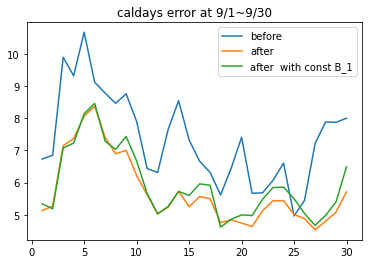

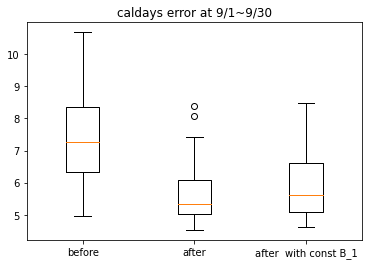

In [123]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,caldays_before_error2, label = 'before')
plt.plot(x,caldays_after_error2, label ='after')
plt.plot(x,caldays_after_errorC2, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([caldays_before_error2,caldays_after_error2,caldays_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("caldays error at 9/1~9/30")

plt.show()

## MADE with cal after how much days (以對第幾天後的預測來看)

(i) Compare January to August (training data set)

In [124]:
days_before_error1=np.zeros(4)
days_after_error1=np.zeros(4)
days_after_errorC1=np.zeros(4)
error1=0
error2=0
error3=0
for k in range(0,4):
    for i in range (0,244):
        for j in range(0,71):
            for l in range(24*k,24*(k+1)):
                error1=error1+abs(old_x[i][(j*96)+l]-old_y[i][(j*96)+l])
                error2=error2+abs(fit_fx[i][(j*96)+l]-old_y[i][(j*96)+l])
                error3=error3+abs(fit_fxC[i][(j*96)+l]-old_y[i][(j*96)+l])
    days_before_error1[k]=error1/244/71/24
    days_after_error1[k]=error2/244/71/24
    days_after_errorC1[k]=error3/244/71/24
    error1=0
    error2=0
    error3=0
print(days_before_error1)
print(days_after_error1)
print(days_after_errorC1)

[6.98159512 7.78522267 8.36345499 8.71668718]
[5.88912378 6.5347553  6.81285943 6.95075711]
[6.29028924 6.74829609 7.15355233 7.40727297]


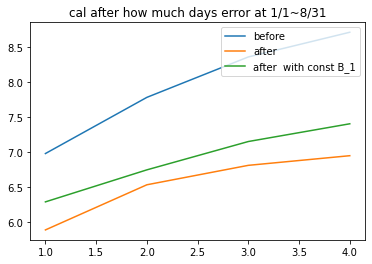

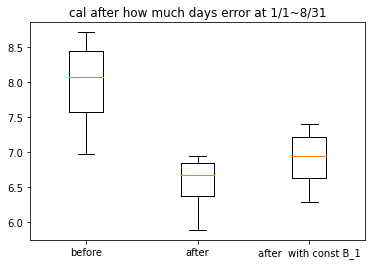

In [125]:
fig1 = plt.figure(1)
x=np.linspace(1,4,4)
plt.plot(x,days_before_error1, label = 'before')
plt.plot(x,days_after_error1, label ='after')
plt.plot(x,days_after_errorC1, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('cal after how much days error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([days_before_error1,days_after_error1,days_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("cal after how much days error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [126]:
days_before_error2=np.zeros(4)
days_after_error2=np.zeros(4)
days_after_errorC2=np.zeros(4)
error1=0
error2=0
error3=0
for k in range(0,4):
    for i in range (244,274):
        for j in range(0,71):
            for l in range(24*k,24*(k+1)):
                error1=error1+abs(old_x[i][(j*96)+l]-old_y[i][(j*96)+l])
                error2=error2+abs(fit_fx[i][(j*96)+l]-old_y[i][(j*96)+l])
                error3=error3+abs(fit_fxC[i][(j*96)+l]-old_y[i][(j*96)+l])
    days_before_error2[k]=error1/30/71/24
    days_after_error2[k]=error2/30/71/24
    days_after_errorC2[k]=error3/30/71/24
    error1=0
    error2=0
    error3=0
print(days_before_error2)
print(days_after_error2)
print(days_after_errorC2)

[6.26227711 7.17784407 7.78812266 8.19685939]
[5.17948797 5.67853218 5.96362317 6.09178616]
[5.48608135 5.7676525  6.10533211 6.34460881]


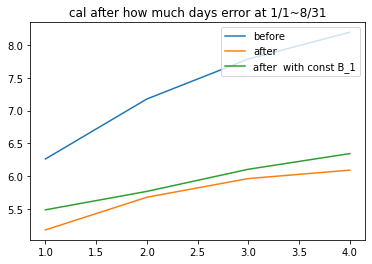

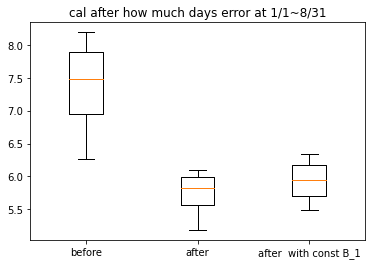

In [127]:
fig1 = plt.figure(1)
x=np.linspace(1,4,4)
plt.plot(x,days_before_error2, label = 'before')
plt.plot(x,days_after_error2, label ='after')
plt.plot(x,days_after_errorC2, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('cal after how much days error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([days_before_error2,days_after_error2,days_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("cal after how much days error at 1/1~8/31")

plt.show()

## MADE with cal after how much hours (以對第幾小時後的預測來看)

(i) Compare January to August (training data set)

In [128]:
hours_before_error1=np.zeros(96)
hours_after_error1=np.zeros(96)
hours_after_errorC1=np.zeros(96)
error1=0
error2=0
error3=0
for k in range(0,96):
    for i in range (0,244):
        for j in range(0,71):
            error1=error1+abs(old_x[i][(j*96)+k]-old_y[i][(j*96)+k])
            error2=error2+abs(fit_fx[i][(j*96)+k]-old_y[i][(j*96)+k])
            error3=error3+abs(fit_fxC[i][(j*96)+k]-old_y[i][(j*96)+k])
    hours_before_error1[k]=error1/244/71
    hours_after_error1[k]=error2/244/71
    hours_after_errorC1[k]=error3/244/71
    error1=0
    error2=0
    error3=0
# print(hours_before_error1)
# print(hours_after_error1)
# print(hours_after_errorC1)

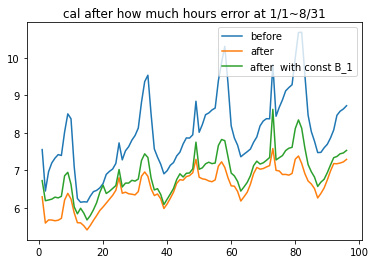

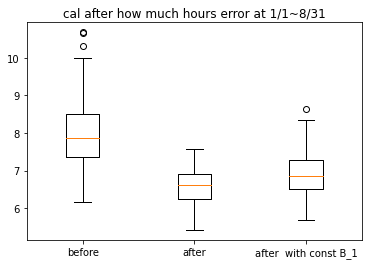

In [129]:
fig1 = plt.figure(1)
x=np.linspace(1,96,96)
plt.plot(x,hours_before_error1, label = 'before')
plt.plot(x,hours_after_error1, label ='after')
plt.plot(x,hours_after_errorC1, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('cal after how much hours error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([hours_before_error1,hours_after_error1,hours_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("cal after how much hours error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [130]:
hours_before_error2=np.zeros(96)
hours_after_error2=np.zeros(96)
hours_after_errorC2=np.zeros(96)
error1=0
error2=0
error3=0
for k in range(0,96):
    for i in range (244,274):
        for j in range(0,71):
            error1=error1+abs(old_x[i][(j*96)+k]-old_y[i][(j*96)+k])
            error2=error2+abs(fit_fx[i][(j*96)+k]-old_y[i][(j*96)+k])
            error3=error3+abs(fit_fxC[i][(j*96)+k]-old_y[i][(j*96)+k])
    hours_before_error2[k]=error1/30/71
    hours_after_error2[k]=error2/30/71
    hours_after_errorC2[k]=error3/30/71
    error1=0
    error2=0
    error3=0
# print(hours_before_error2)
# print(hours_after_error2)
# print(hours_after_errorC2)

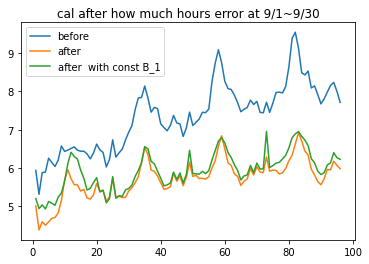

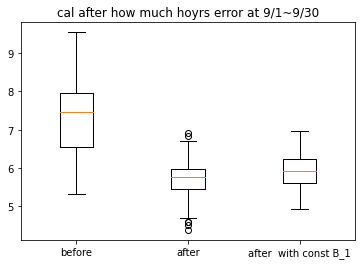

In [131]:
fig1 = plt.figure(1)
x=np.linspace(1,96,96)
plt.plot(x,hours_before_error2, label = 'before')
plt.plot(x,hours_after_error2, label ='after')
plt.plot(x,hours_after_errorC2, label ='after  with const B_1')
plt.legend(loc = 2)
plt.title('cal after how much hours error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([hours_before_error2,hours_after_error2,hours_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("cal after how much hoyrs error at 9/1~9/30")

plt.show()

## MADE with station (以測站來看)

(i) Compare January to August (training data set)

In [132]:
station_before_error1=np.zeros(71)
station_after_error1=np.zeros(71)
station_after_errorC1=np.zeros(71)
error1=0
error2=0
error3=0
for k in range(0,71):
    for i in range (0,244):
        for j in range(96*k,96*(k+1)):
            error1=error1+abs(old_x[i][j]-old_y[i][j])
            error2=error2+abs(fit_fx[i][j]-old_y[i][j])
            error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    station_before_error1[k]=error1/244/96
    station_after_error1[k]=error2/244/96
    station_after_errorC1[k]=error3/244/96
    error1=0
    error2=0
    error3=0

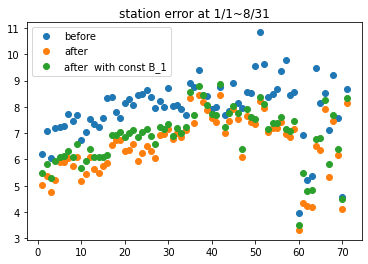

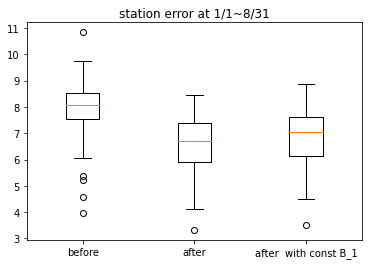

In [133]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,station_before_error1,'o', label = 'before')
plt.plot(x,station_after_error1,'o', label ='after')
plt.plot(x,station_after_errorC1, 'o',label ='after  with const B_1')
plt.legend(loc = 2)
plt.title('station error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([station_before_error1,station_after_error1,station_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("station error at 1/1~8/31")

plt.show()

In [136]:
station_error1=station_before_error1+station_after_error1+station_after_errorC1
x1=np.zeros(5)
for i in range (0,5):
    x1[i]=sorted(station_error1)[70-i]
print(x1)
y1=np.zeros(5)
for i in range (0,5):
    for j in range(0,71):
        if station_error1[j]==x1[i]:
            y1[i]=j
print(y1)

[27.4184838  26.62554179 26.07157589 25.78676593 25.70858148]
[50. 36. 41. 34. 51.]


(ii) Compare September (testing data set)

In [137]:
station_before_error2=np.zeros(71)
station_after_error2=np.zeros(71)
station_after_errorC2=np.zeros(71)
error1=0
error2=0
error3=0
for k in range(0,71):
    for i in range (244,274):
        for j in range(96*k,96*(k+1)):
            error1=error1+abs(old_x[i][j]-old_y[i][j])
            error2=error2+abs(fit_fx[i][j]-old_y[i][j])
            error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    station_before_error2[k]=error1/30/96
    station_after_error2[k]=error2/30/96
    station_after_errorC2[k]=error3/30/96
    error1=0
    error2=0
    error3=0

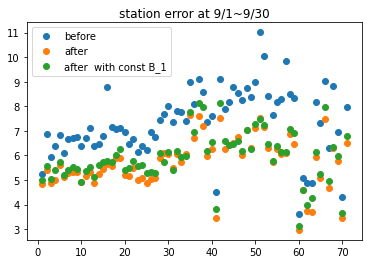

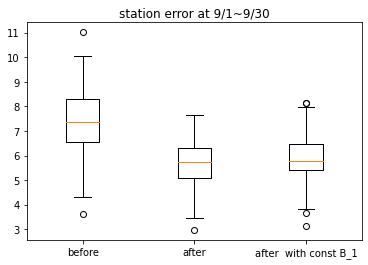

In [138]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,station_before_error2,'o', label = 'before')
plt.plot(x,station_after_error2,'o', label ='after')
plt.plot(x,station_after_errorC2, 'o',label ='after  with const B_1')
plt.legend(loc = 2)
plt.title('station error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([station_before_error2,station_after_error2,station_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("station error at 9/1~9/30")

plt.show()

In [139]:
station_error2=station_before_error2+station_after_error2+station_after_errorC2
x2=np.zeros(5)
for i in range (0,5):
    x2[i]=sorted(station_error2)[70-i]
print(x2)
y2=np.zeros(5)
for i in range (0,5):
    for j in range(0,71):
        if station_error2[j]==x2[i]:
            y2[i]=j
print(y2)

[26.02370518 24.81639157 24.77172521 24.46803471 24.43981368]
[50. 36. 41. 65. 51.]
